In [3]:
PLOT_CLASSES = '/home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/dhnlplotting/util/'
import sys
import os
if not PLOT_CLASSES in sys.path:
    sys.path.append(PLOT_CLASSES)

import plot_classes
import plot_base
import importlib
importlib.reload(plot_classes)
importlib.reload(plot_base)
from IPython.display import display, Image
import ROOT
ROOT.gROOT.SetStyle("ATLAS")
ROOT.gStyle.SetImageScaling(4.)

files ={ 
    # ee
    ## SS
    "ee_ss_old" : "/data/hnl/v6_histograms/jun13_CR_histograms/fullrun2_CR_histograms_data_SS_ee.root",
    "ee_ss_new" : "/data/hnl/v8_histograms/jul23_inverted_plep_VR_v8p0_histograms/fullrun2_CR_histograms_data_SS_ee.root",
    ## OS
    "ee_os_old" : "/data/hnl/v6_histograms/jun13_CR_histograms/fullrun2_CR_histograms_data_OS_ee.root",
    "ee_os_new" : "/data/hnl/v8_histograms/jul23_inverted_plep_VR_v8p0_histograms/fullrun2_CR_histograms_data_OS_ee.root",

    # eu
    ## SS
    "eu_ss_old" : "/data/hnl/v6_histograms/jun13_CR_histograms/fullrun2_CR_histograms_data_SS_eu.root",
    "eu_ss_new" : "/data/hnl/v8_histograms/jul23_inverted_plep_VR_v8p0_histograms/fullrun2_CR_histograms_data_SS_eu.root",
    ## OS
    "eu_os_old" : "/data/hnl/v6_histograms/jun13_CR_histograms/fullrun2_CR_histograms_data_OS_eu.root",
    "eu_os_new" : "/data/hnl/v8_histograms/jul23_inverted_plep_VR_v8p0_histograms/fullrun2_CR_histograms_data_OS_eu.root",
}

# for v in files.values():
#     print(v)
#     if not os.path.isfile(v):
#         print("problem")
#         break
# print("no problem")


In [16]:




#     luminosity = 139 #fb^-1
#     cross_section = 831e3 #fb
#     branching_ratio = 0.54 # non-all-hadronic ttbar
#     nentries = 50e3 # nevents in mc16d sample
#     weight = luminosity * cross_section * branching_ratio / nentries
#     print (f'{luminosity} * {cross_section} * {branching_ratio} / {nentries} = {weight}')


extra_cuts = ""
# extra_cuts += "*(DV_2veryveryloose > 0)"
# extra_cuts += "*(DV_pass_lep_pt >0)"
# extra_cuts += "*(DV_mass > 5.5)"
# extra_cuts += "*(DV_pass_mat_veto >0)"
# # extra_cuts += "*(mvis>40 && mvis < 90)"
# # extra_cuts += "*(HNLm<20)"
# extra_cuts += "*(DV_cosmic_sep > 0.05)"
# # extra_cuts += "*(n_trigger_matched_medium>0)"

ee_extra_cuts = extra_cuts + "*(DV_mass > 5.5)" # flat dv mass cut
# eu_extra_cuts = extra_cuts + "*(((DV_mass >2 && DV_mass <5.5) && DV_mass > -(7/150)*DV_r + 7 ) || DV_mass > 5.5)" # diagonal cut

hist_channels = [
    {'filename':files[f'ee_ss_old'], 
    'label':f'ee VR SS old', 
    'vtx_alg':'VSI_LeptonsMod', 
    'selection':'DVtype', 
    'MCtype':None, 
    # 'scale': weight , #picobarns
    'extra_cuts': ee_extra_cuts,
    },
    {'filename' : files[f'ee_ss_new'], 
    'label' : f'ee VR SS new',
    'vtx_alg' : 'VSI_LeptonsMod',
    'selection' : 'DVtype',
    'MCtype' : None,
    # 'scale':1,
    'extra_cuts': ee_extra_cuts,
    }
]



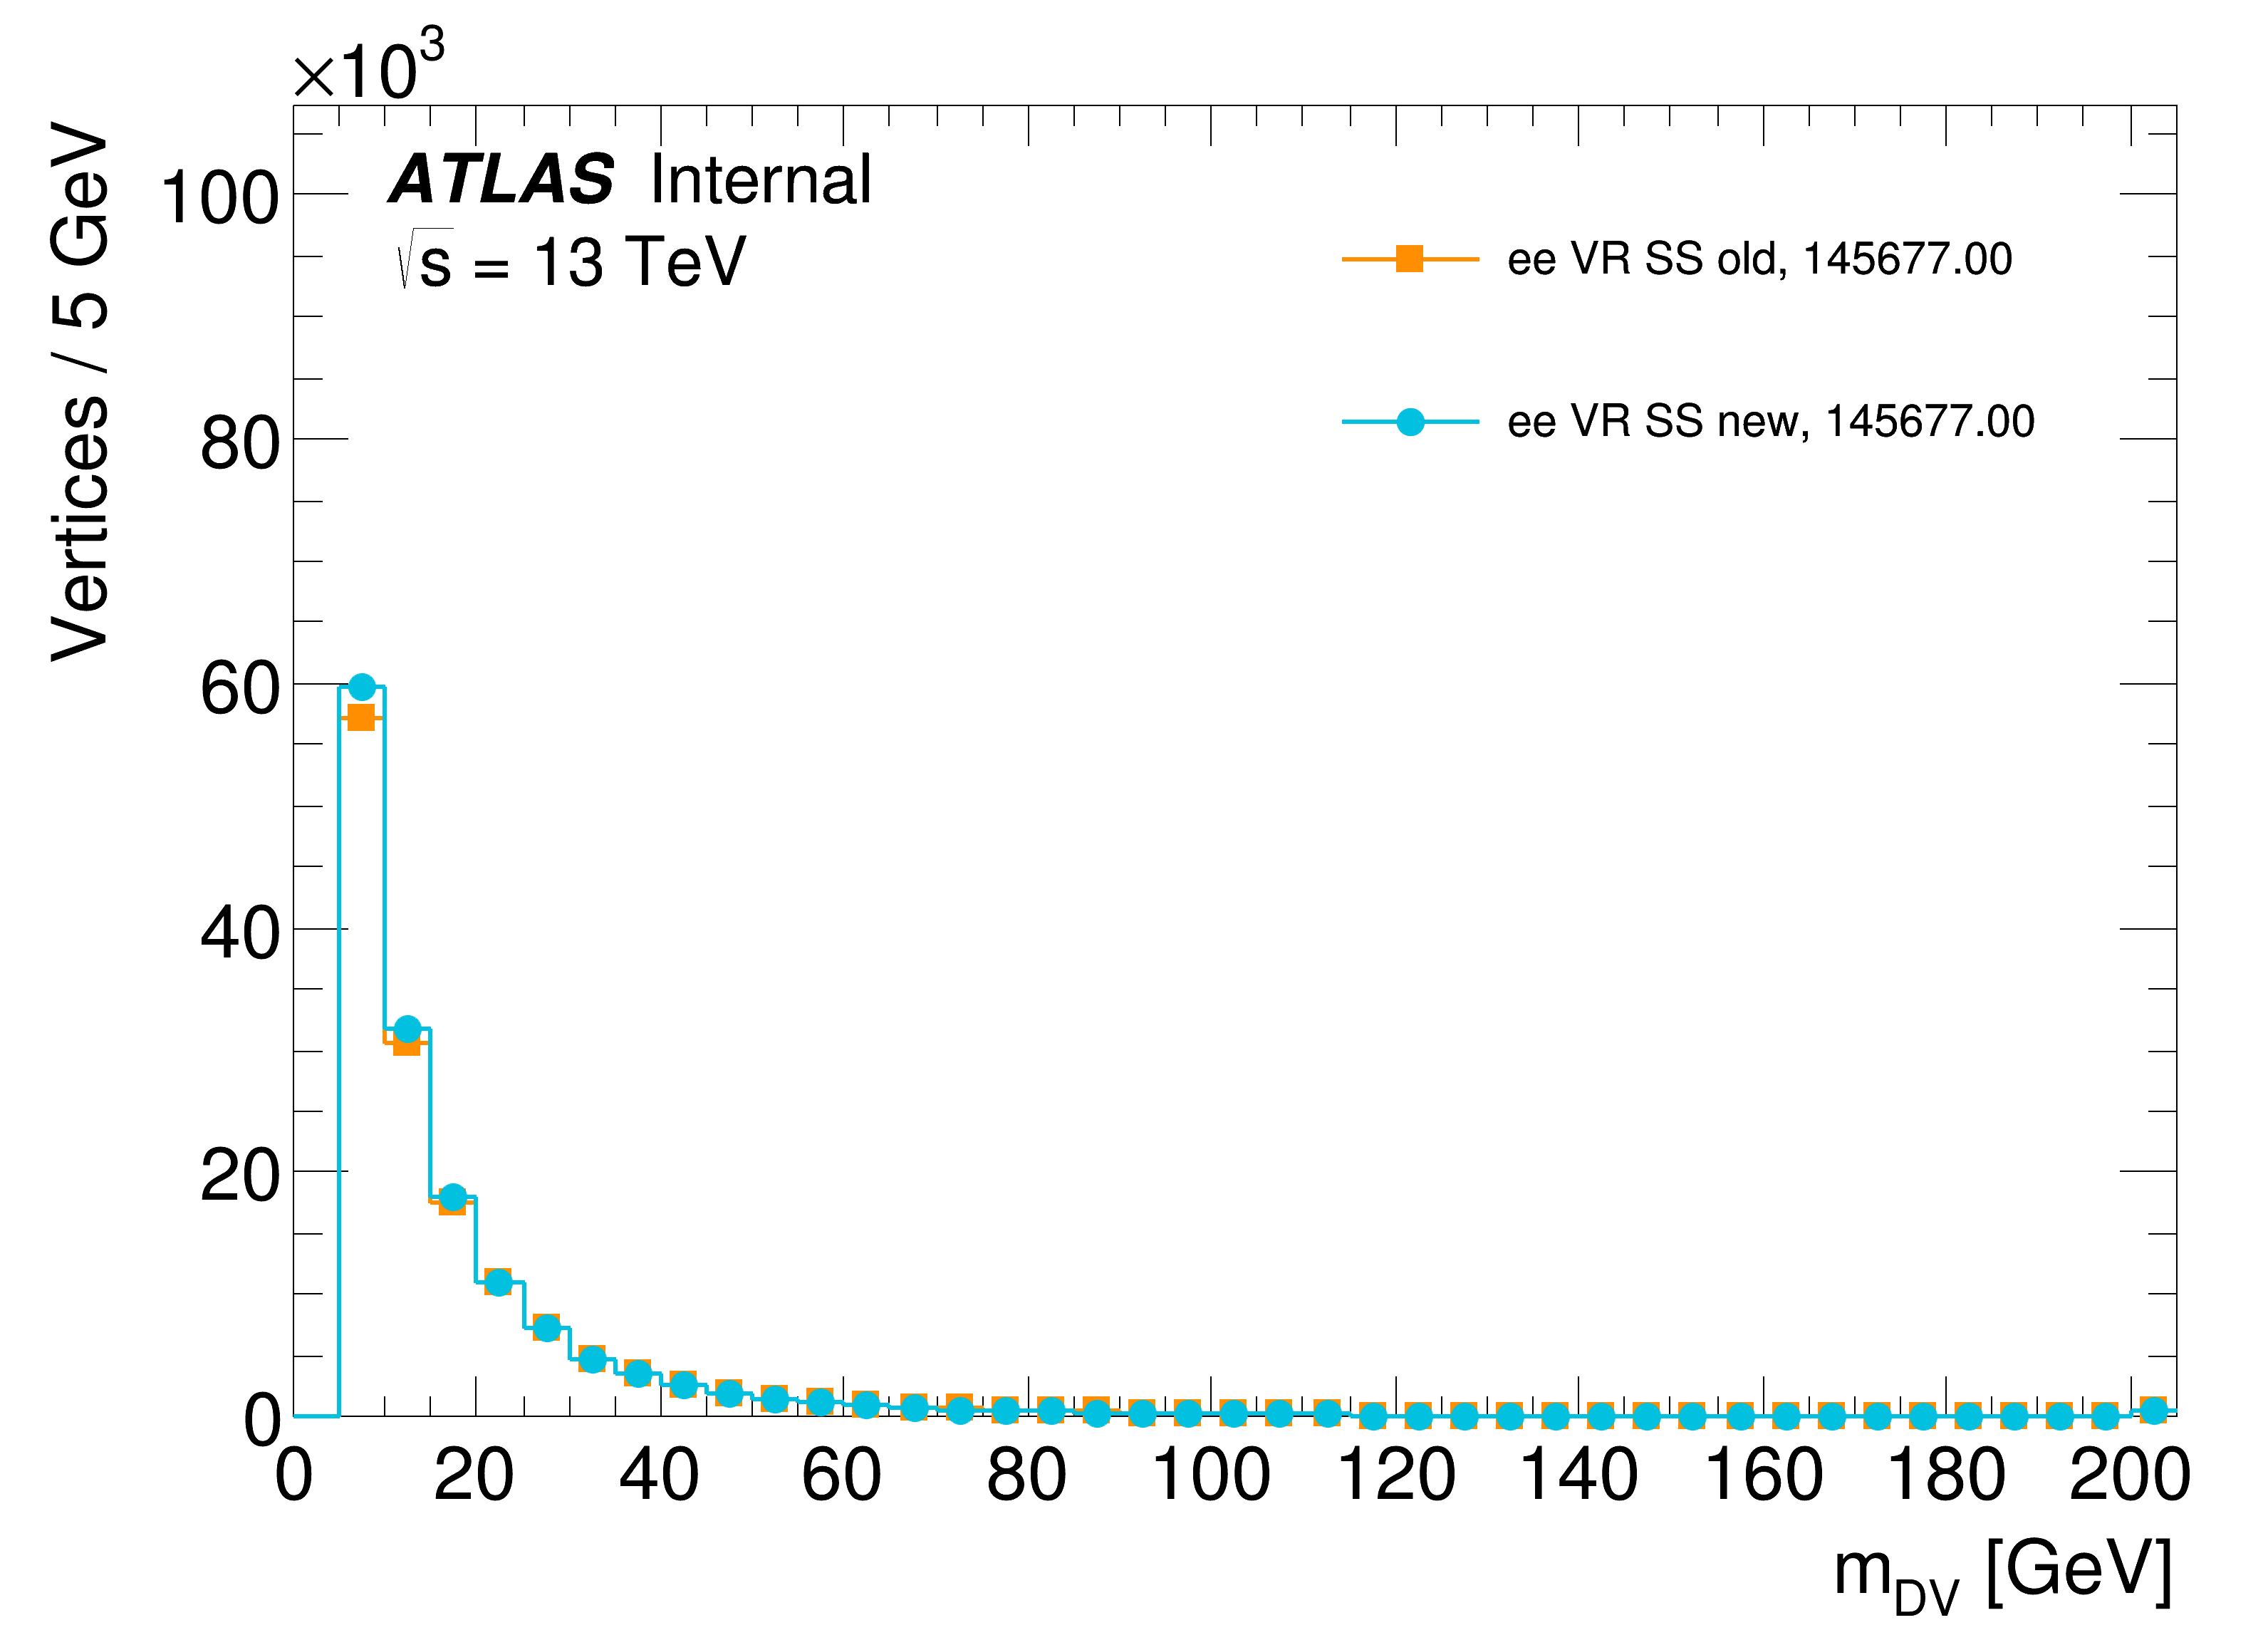

Info in <TCanvas::Print>: pdf file /home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/grl_update/plots/ee_ss_old/DV_mass.pdf has been created
Info in <TCanvas::Print>: png file /home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/grl_update/plots/ee_ss_old/DV_mass.png has been created


In [17]:

    plot_classes.Hist1D(hist_channels= hist_channels,
        types = [f'eeu','eee'],
        output_dir = f'/home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/grl_update/plots/ee_ss_old/',
        name="DV_mass",
        x_title ="m_{DV}",
        x_units ="GeV",
        # y_title = "Vertices (normalized)",
        x_min = 0,
        x_max = 200,
        y_min = 0,
        # rebin = 100,
        use_ntuple = True,
        ntup_nbins =40,
        # scaleLumi = 140.0,
        # dataLumi = 140.0,
        norm = False,
        log_scale_y = False,
        draw_markers = True,
        atlas_mod = "Internal",
        # extra_legend_lines = ['DV_mass>2'],
        leg_size_mod=1.0,
        # ratio_ymin=  .5, 
        # ratio_ymax = 1.5,

        )
    display(Image(filename=f'/home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/grl_update/plots/ee_ss_old/DV_mass.png'));



In [ ]:

#     plot_classes.Hist1D(hist_channels= hist_channels,
#         types = [f'ttbar_{channel}','data'],
#         output_dir = f'/home/newhouse/public/Analysis/HNL/dhnlplotting/output/ttbar/{channel}/',
#         name="DV_r",
#         x_title ="r_{DV}",
#         x_units ="mm",
#         # y_title = "Vertices (normalized)",
#         x_min = 0,
#         x_max = 100,
#         y_min = 0,
#         # rebin = 100,
#         use_ntuple = True,
#         ntup_nbins =20,
#         scaleLumi = 140.0,
#         dataLumi = 140.0,
#         norm = False,
#         log_scale_y = False,
#         draw_markers = True,
#         atlas_mod = "Internal",
#         extra_legend_lines = ['DV_mass>2'],
#         leg_size_mod=1.0,
#         # ratio_ymin=  .5, 
#         # ratio_ymax = 1.5,

#         )
#     # display(Image(filename=f'/home/newhouse/public/Analysis/HNL/dhnlplotting/output/ttbar/{channel}/DV_r.png'));


#     plot_classes.Hist1D(hist_channels= hist_channels,
#         types = [f'ttbar_{channel}','data'],
#         output_dir = f'/home/newhouse/public/Analysis/HNL/dhnlplotting/output/ttbar/{channel}/',
#         name="DV_pt",
#         x_title ="DV pt",
#         x_units ="mm",
#         # y_title = "Vertices (normalized)",
#         x_min = 0,
#         x_max = 100,
#         y_min = 0,
#         # rebin = 100,
#         use_ntuple = True,
#         ntup_nbins =20,
#         scaleLumi = 140.0,
#         dataLumi = 140.0,
#         norm = False,
#         log_scale_y = False,
#         draw_markers = True,
#         atlas_mod = "Internal",
#         extra_legend_lines = ['DV_mass>2'],
#         leg_size_mod=1.0,
#         # ratio_ymin=  .5, 
#         # ratio_ymax = 1.5,

#         )
#     display(Image(filename=f'/home/newhouse/public/Analysis/HNL/dhnlplotting/output/ttbar/{channel}/DV_pt.png'));
